### Empirical Example for RobustiPY (Type 2)!

#### This example is designed to show how the OLSRobust class can be used to estimate a model with longitudinal data.

To get access to this data, you'll need the Understanding Society: Longitudinal Teaching Dataset, Waves 1-9, 2009-2018 from [[here](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8715#!/access-data)]. Registration is immediate for this. Documentation which accompanies it can be found [[here](https://doc.ukdataservice.ac.uk/doc/8715/mrdoc/pdf/8715_user_guide.pdf)].

You want to put this data somewhere like `.data/input`.

As always, lets load in some of the libraries which we'll need:

In [1]:
import os
import numpy as np
import pandas as pd
from robustipy.models import OLSRobust

Then, load in the dataset (note: we are using the tab-seperated version, but they should all be equivilent):

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), '..',
                              'data',
                              'ukhls_example',
                              'longitudinal_td.tab'), sep='\t',
                 low_memory=False)
df['pidp'] = df['pidp'].astype(int)
#df['pidp'] = pd.to_numeric(df['pidp'], errors='raise')
df.dtypes

pidp           int64
wave           int64
hidp           int64
buno_dv        int64
intdatd_dv    object
               ...  
envhabit7     object
envhabit8     object
envhabit9     object
envhabit10    object
envhabit11    object
Length: 148, dtype: object

Let's quickly eyeball the data to see what we have:

In [3]:
df.head(5)

,pidp,wave,hidp,buno_dv,intdatd_dv,intdatm_dv,intdaty_dv,indmode,numintd_dv,hhorig,...,envhabit2,envhabit3,envhabit4,envhabit5,envhabit6,envhabit7,envhabit8,envhabit9,envhabit10,envhabit11
0,68001367,1,68001363,1,19,1,2009,1,1,1,...,2,4,4,4,3,3,3,1,5,1
1,68004087,1,68004083,1,8,1,2009,1,9,1,...,1,5,1,3,2,1,5,3,4,6
2,68004087,2,68013602,1,16,2,2010,1,9,1,...,,,,,,,,,,
3,68004087,3,68013604,1,9,2,2011,1,9,1,...,,,,,,,,,,
4,68004087,4,68013606,1,24,1,2012,1,9,1,...,1,5,1,5,3,1,6,2,5,6


Our main dependent variable of interest is sf1_dv: General health.

In [4]:
df['sf1_dv'] = pd.to_numeric(df['sf1_dv'], errors='coerce')

Then, we're going to binarise it so that good health is 3 or more (==1), zero otherwise:

In [5]:
df = df[df['sf1_dv']>0]
df['sf1_dv_good'] = np.where(df['sf1_dv']>=3, 1, 0)

Let's convert our `sex_dv` variable into binary 1s and zeros:

<Axes: >

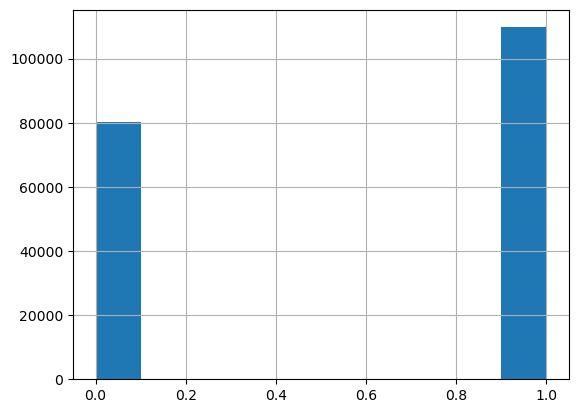

In [6]:
df['sex_dv'] = pd.to_numeric(df['sex_dv'], errors='coerce')
df['sex_dv'] = np.where(df['sex_dv']==2, 1, 0)
df['sex_dv'].hist()

Let's do something similar for cohab_dv, but this is already 1s and 0s:

In [7]:
df['cohab_dv'] = pd.to_numeric(df['cohab_dv'], errors='coerce')
df = df[df['cohab_dv']>=0]

<Axes: >

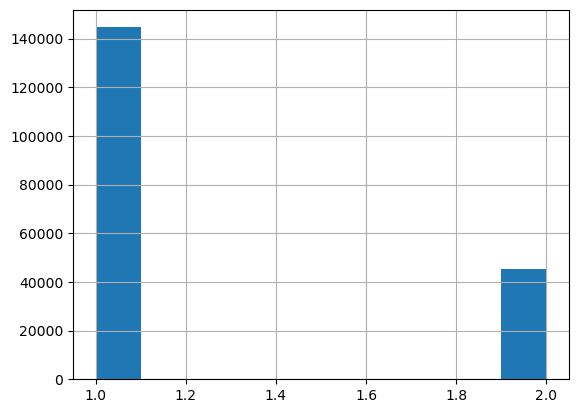

In [8]:
df['urban_dv'] = pd.to_numeric(df['urban_dv'], errors='coerce')
df = df[df['urban_dv']>0]
df['urban_dv'].hist()

Lets then – for simplicity and without failing to appreciate the complexity of this variable – dichotomize an additional variable (after cleaning it for missing/non-response). You can make something as simple as `is_british` (==1, 0 otherwise), or something more elaborate.

In [9]:
df['ethn_dv'] = pd.to_numeric(df['ethn_dv'], errors='coerce')
df = df[df['ethn_dv']>0]
df['is_british'] = np.where(df['ethn_dv']==1, 1, 0)

In [10]:
df = df[df['hhsize_dv']>0]

In [11]:
df['age_dv'] = pd.to_numeric(df['age_dv'], errors='coerce')
df = df[df['age_dv']>0]

Let's next make a variable for whether an individual has a degree or not:

In [12]:
df['hiqual_dv'] = pd.to_numeric(df['hiqual_dv'], errors='coerce')
df = df[df['hiqual_dv']>0]
df['has_degree'] = np.where(df['hiqual_dv']==3, 1, 0)

In [13]:
df['jbstat'] = pd.to_numeric(df['jbstat'], errors='coerce')
df = df[df['jbstat']>0]
df['jbstat'] = np.where(df['jbstat']<=2, 1, 0)

<Axes: >

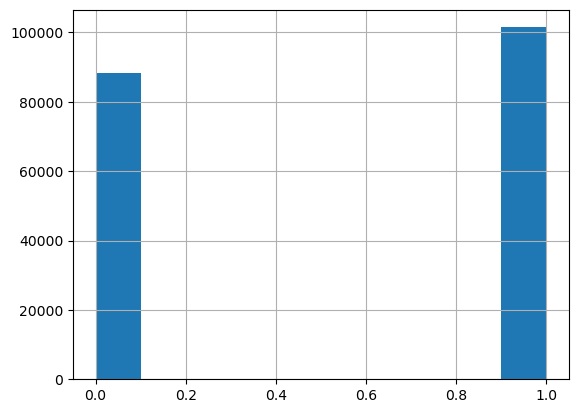

In [14]:
df['jbstat'].hist()

Subset our dataframe for simplicity:

In [15]:
df = df.reset_index()
df = df[['sf1_dv_good', 'age_dv', 'sex_dv', 'cohab_dv', 'pidp', 'is_british', 'urban_dv', 'hhsize_dv', 'has_degree', 'jbstat']]
df.head(5)

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv,has_degree,jbstat
0,0,39.0,0,0,68001367,1,1.0,1,1,1
1,0,59.0,0,0,68004087,0,1.0,1,0,1
2,0,60.0,0,0,68004087,0,1.0,1,0,1
3,0,61.0,0,0,68004087,0,1.0,1,0,1
4,0,62.0,0,0,68004087,0,1.0,1,0,1


What's the length?

In [16]:
len(df)

189858

Now let's drop and see if we lose any (we shouldnt, though! Why?)

In [17]:
df = df.dropna()
print(len(df))

189858


Now what does our dataset look like?

In [18]:
df.head(5)

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv,has_degree,jbstat
0,0,39.0,0,0,68001367,1,1.0,1,1,1
1,0,59.0,0,0,68004087,0,1.0,1,0,1
2,0,60.0,0,0,68004087,0,1.0,1,0,1
3,0,61.0,0,0,68004087,0,1.0,1,0,1
4,0,62.0,0,0,68004087,0,1.0,1,0,1


Lets quickly check the correlation matrix to check that nothing funky is going on:

In [19]:
df.corr()

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv,has_degree,jbstat
sf1_dv_good,1.000000,0.196541,-0.003253,-0.032659,0.000109,0.003224,-0.031297,-0.104842,-0.020147,-0.208361
age_dv,0.196541,1.000000,-0.041374,-0.205489,0.004652,0.231569,0.127629,-0.468516,-0.131951,-0.460570
sex_dv,-0.003253,-0.041374,1.000000,-0.007806,-0.007919,-0.004091,0.006577,0.024336,-0.065422,-0.064780
cohab_dv,-0.032659,-0.205489,-0.007806,1.000000,-0.006143,0.063252,-0.021351,0.077753,0.025600,0.125091
pidp,0.000109,0.004652,-0.007919,-0.006143,1.000000,-0.025526,-0.031089,0.014131,0.003348,-0.012890
is_british,0.003224,0.231569,-0.004091,0.063252,-0.025526,1.000000,0.182263,-0.221361,0.019640,-0.045136
urban_dv,-0.031297,0.127629,0.006577,-0.021351,-0.031089,0.182263,1.000000,-0.052494,-0.008296,-0.026722
hhsize_dv,-0.104842,-0.468516,0.024336,0.077753,0.014131,-0.221361,-0.052494,1.000000,0.058772,0.230737
has_degree,-0.020147,-0.131951,-0.065422,0.025600,0.003348,0.019640,-0.008296,0.058772,1.000000,0.062721
jbstat,-0.208361,-0.460570,-0.064780,0.125091,-0.012890,-0.045136,-0.026722,0.230737,0.062721,1.000000


What data types do we have here?

In [20]:
df.dtypes

sf1_dv_good      int64
age_dv         float64
sex_dv           int64
cohab_dv         int64
pidp             int64
is_british       int64
urban_dv       float64
hhsize_dv        int64
has_degree       int64
jbstat           int64
dtype: object

Finally, lets call RobustiPy as we do in other examples, noting the group='pipd' call:

In [21]:
ukhls_robustipy = OLSRobust(y=['sf1_dv_good'],
                            x=['age_dv'],
                            data=df.dropna())

Now, let's fit the model:

In [22]:
ukhls_robustipy.fit(controls=['cohab_dv',
                              'sex_dv',
                              'is_british',
                              'urban_dv',
                              'hhsize_dv',
                              'has_degree',
                              'jbstat'
                             ],
                   draws=1000,
                   oos_metric='r-squared',
                   kfold=10,
                   group='pidp'
                   )

[OLSRobust] Running with n_cpu=31, draws=1000


Output()

And, get the results:

In [23]:
ukhls_results = ukhls_robustipy.get_results()

Plot results:

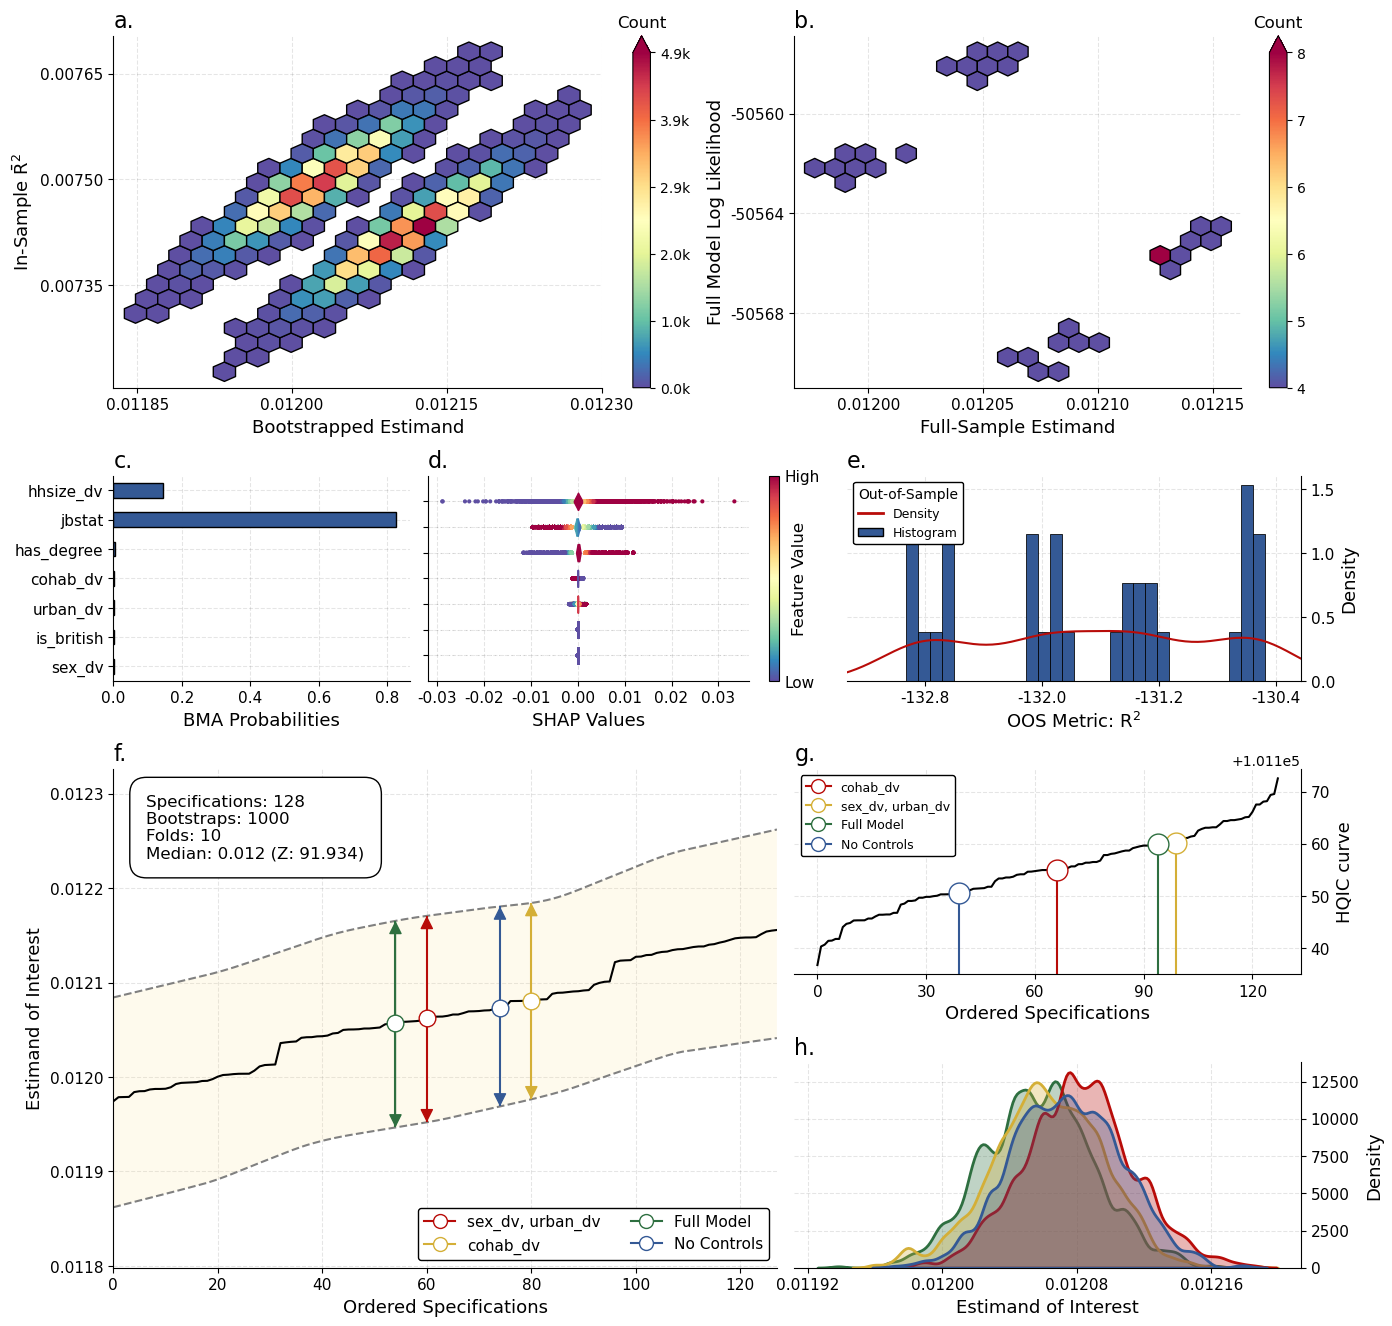

In [24]:
ukhls_results.plot(ic='hqic',
                   figsize=(16, 16),
                   specs=[['sex_dv', 'urban_dv'], ['cohab_dv']],
                   project_name='ukhls_example',
                   figpath = '../figures/',
                   ext='pdf'
                   )

And print the summary statistic:

In [25]:
ukhls_results.summary(digits=2)

1. Model Summary
Model: OLS Robust
Inference Tests: Yes
Dependent variable: sf1_dv_good
Independent variable: age_dv
Number of possible controls: 7
Number of draws: 1000
Number of folds: 10
Number of specifications: 128
2.Model Robustness Metrics
2.1 Inference Metrics
Median beta (all specifications, no resampling): 0.01 (p-value: 0.0)
Median beta (all bootstraps and specifications): 0.01
Min beta (all specifications, no resampling): 0.01
Min beta (all bootstraps and specifications): 0.01
Max beta (all specifications, no resampling): 0.01
Max beta (all bootstraps and specifications): 0.01
AIC-weighted beta (all specifications, no resampling): 0.01
BIC-weighted beta (all specifications, no resampling): 0.01
HQIC-weighted beta (all specifications, no resampling): 0.01
Significant portion of beta (all specifications, no resampling): 1.0 (p-value: 0.0)
Significant portion of beta (all bootstraps and specifications): 1.0
Positive portion of beta (all specifications, no resampling): 1.0 (p-v